In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import astropy
import gammapy

print("numpy:", np.__version__)
print("astropy:", astropy.__version__)
print("gammapy:", gammapy.__version__)

numpy: 1.16.4
astropy: 3.1.2
gammapy: 0.12


In [3]:
from gammapy.data import DataStore
data_store_1 = DataStore.from_dir('/home/rishank/examples')
events = data_store_1.obs(5079502).events

In [4]:
events.table

EVENT_ID,TIME,RA,DEC,ENERGY
,s,deg,deg,TeV
int64,float64,float32,float32,float32
40,502178073.5596727,598.6844,9.913824,1.1384147
80,502178073.676484,599.3984,11.948032,0.09112201
86,502178073.6854321,599.73773,11.538768,0.07689782
114,502178073.76779246,599.1518,11.445541,0.12473012
129,502178073.8083713,599.3769,11.118517,0.15058048
139,502178073.83106405,600.4558,11.936661,0.7678049
157,502178073.901726,600.39795,10.865199,0.08112366
194,502178074.0121069,599.4491,11.315984,0.23646021


<SkyCoord (Galactic): (l, b) in deg
    (22.16910101, 43.60591339)>

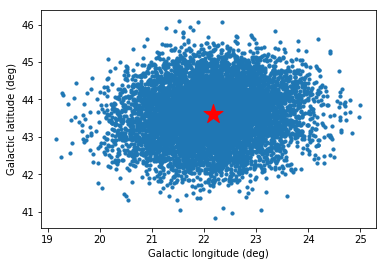

In [5]:
# Event positions
pos = events.galactic[::1]  # sub-sample every 100th event
x = plt.scatter(pos.l.wrap_at("180 deg").deg, pos.b.deg, s=10)
# Pointing position
pos_pnt = events.pointing_radec.galactic
plt.scatter(
    pos_pnt.l.wrap_at("180 deg").deg, pos_pnt.b.deg, marker="*", s=400, c="red"
)
plt.xlabel("Galactic longitude (deg)")
plt.ylabel("Galactic latitude (deg)")
pos_pnt


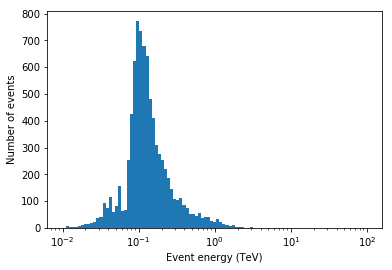

In [6]:
energy = events.table["ENERGY"].data
energy_bins = np.logspace(-2, 2, num=100)
plt.hist(energy, bins=energy_bins)
plt.semilogx()
plt.xlabel("Event energy (TeV)")
plt.ylabel("Number of events");

In [7]:
is_gamma = events.table["MC_ID"] == 1
print("Number of events: ", len(events.table))
print("Number of gammas: ", is_gamma.sum())
print("Number of hadrons: ", len(events.table) - is_gamma.sum())

KeyError: 'MC_ID'

In [12]:
from astropy import units as u
from astropy.coordinates import SkyCoord

ra = events.table["RA"].data
dec = events.table["DEC"].data
print(ra.mean())
print(dec.mean())
gamma_ra = ra[is_gamma].mean()
print(gamma_ra)
gamma_dec = dec[is_gamma].mean()
print(gamma_dec)
d = SkyCoord(ra=gamma_ra*u.degree, dec=gamma_dec*u.degree, frame='icrs')
d.galactic

83.63059
22.474377
83.63297
22.014452


<SkyCoord (Galactic): (l, b) in deg
    (184.55744347, -5.78446903)>

In [ ]:
energy = events.table["ENERGY"].data
energy_bins = np.logspace(-2, 2, num=100)
opts = dict(bins=energy_bins, density=True, histtype="step")
plt.hist(energy[~is_gamma], label="hadron", **opts)
plt.hist(energy[is_gamma], label="gamma", **opts)
plt.loglog()
plt.xlabel("Event energy (TeV)")
plt.ylabel("Number of events")
plt.legend();

In [8]:

energy_bins = 10 ** np.linspace(-2, 2, 100)
offset_bins = np.arange(0, 0.6, 0.1)

t = events.table
offset = np.sqrt(t["DETX"] ** 2 + t["DETY"] ** 2)
hist = np.histogram2d(
    x=t["ENERGY"], y=offset, bins=(energy_bins, offset_bins)
)[0].T

from matplotlib.colors import LogNorm

plt.pcolormesh(energy_bins, offset_bins, hist, norm=LogNorm())
plt.semilogx()
plt.colorbar()
plt.xlabel("Energy (TeV)")
plt.ylabel("Offset (deg)")

KeyError: 'DETX'

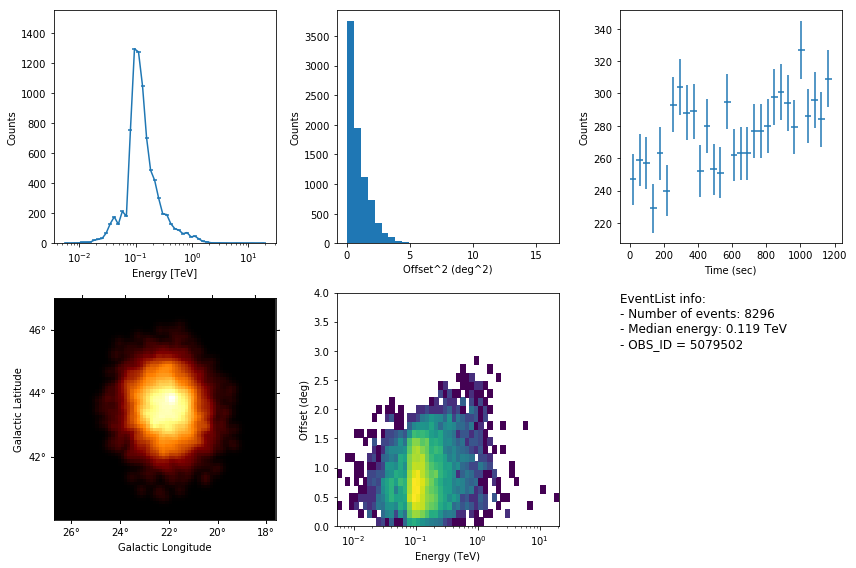

In [9]:
events.peek()

In [10]:
# Event positions
pos = events.galactic[~is_gamma][::1]  # sub-sample every 100th event
plt.scatter(pos.l.wrap_at("180 deg").deg, pos.b.deg, s=10)
# Pointing position
pos_pnt = events.pointing_radec.galactic
plt.scatter(
    pos_pnt.l.wrap_at("180 deg").deg, pos_pnt.b.deg, marker="*", s=400, c="red"
)
plt.xlabel("Galactic longitude (deg)")
plt.ylabel("Galactic latitude (deg)")
pos_pnt


#Event positions
pos = events.galactic[is_gamma][::1]  # sub-sample every 100th event
plt.scatter(pos.l.wrap_at("180 deg").deg, pos.b.deg, s=10)
# Pointing position
pos_pnt = events.pointing_radec.galactic
plt.scatter(
    pos_pnt.l.wrap_at("180 deg").deg, pos_pnt.b.deg, marker="*", s=400, c="red"
)
plt.xlabel("Galactic longitude (deg)")
plt.ylabel("Galactic latitude (deg)")
pos_pnt

NameError: name 'is_gamma' is not defined

In [ ]:
from gammapy.extern import xmltodict
import os

filename = "crab.xml"
data = xmltodict.parse(open(filename).read())
data = data["source_library"]["source"][0]
data = data["spectrum"]["parameter"]
data

In [ ]:
from astropy import units as u
from gammapy.spectrum.models import PowerLaw

par_to_val = lambda par: float(par["@value"]) * float(par["@scale"])
spec = PowerLaw(
    amplitude=par_to_val(data[0]) * u.Unit("cm-2 s-1 MeV-1"),
    index=par_to_val(data[1]),
    reference=par_to_val(data[2]) * u.Unit("MeV"),
)
print(spec)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
!gammapy info --no-envvar --no-system


Gammapy package:

	path                   : /home/rishank/anaconda2/envs/gammapy-0.12/lib/python3.6/site-packages/gammapy 
	version                : 0.12       


Other packages:

	numpy                  : 1.16.4     
	scipy                  : 1.2.1      
	matplotlib             : 2.2.3      
	cython                 : not installed 
	astropy                : 3.1.2      
	astropy_healpix        : 0.4        
	reproject              : 0.4        
	sherpa                 : 4.11.0     
	pytest                 : 4.6.2      
	sphinx                 : not installed 
	healpy                 : 1.11.0     
	regions                : 0.3        
	iminuit                : 1.3.6      
	naima                  : 0.8.3      
	uncertainties          : 3.0.3      



In [11]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.convolution import Gaussian2DKernel
from regions import CircleSkyRegion, PixCoord
from gammapy.utils.energy import EnergyBounds
from gammapy.utils.fitting import Fit
from gammapy.data import DataStore, DataStoreObservation
from gammapy.spectrum import (
    SpectrumExtraction,
    models,
    FluxPointsEstimator,
    FluxPointsDataset,
)
from gammapy.maps import MapAxis, WcsNDMap, WcsGeom
from gammapy.cube import MapMaker
from gammapy.background import ReflectedRegionsBackgroundEstimator
from gammapy.detect import TSMapEstimator, find_peaks

In [12]:
import logging

logging.basicConfig()
log = logging.getLogger("gammapy.spectrum")
log.setLevel(logging.ERROR)

In [13]:
data_store = DataStore.from_dir("/home/rishank/examples")


In [22]:
obs_id = [5079502, 5079503, 5079504]
observations = data_store.get_observations()

In [23]:
data_store.obs_table.select_obs_id(obs_id)

OBS_ID,RA_PNT,DEC_PNT,ZEN_PNT,ALT_PNT,AZ_PNT,ONTIME,LIVETIME,DEADC,TSTART,TSTOP,N_TELS,TELLIST
,deg,deg,deg,deg,deg,s,s,,s,s,,
int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bytes20
5079502,239.34166,11.194722,34.857044,55.142956,113.724976,1182.2253,1174.2427,0.99324775,502178080.0,502179260.0,2,"MAGIC-I,MAGIC-II"
5079503,238.52916,11.194167,30.209272,59.79073,120.308815,1179.0671,1171.0693,0.9932169,502179300.0,502180480.0,2,"MAGIC-I,MAGIC-II"
5079504,238.9375,11.594722,26.82644,63.17356,125.42156,942.1466,935.76135,0.99322265,502180540.0,502181470.0,2,"MAGIC-I,MAGIC-II"


In [24]:
from gammapy.utils.time import time_ref_from_dict
table = data_store.obs_table
print(time_ref_from_dict(table.meta))

52706.0


In [25]:
from astropy import units as u
from astropy.coordinates import SkyCoord
c = SkyCoord(ra=186.15609741*u.degree, dec=-64.019*u.degree, frame='icrs')

In [26]:
c.galactic 

<SkyCoord (Galactic): (l, b) in deg
    (300.00001584, -1.29999832)>

In [27]:
axis = MapAxis.from_edges(
    np.logspace(-1.0, 1.0, 10), unit="TeV", name="energy", interp="log"
)
geom = WcsGeom.create(
    skydir=(21.9089189421652, +43.9641622198634), npix=(500, 400), binsz=0.02, coordsys="GAL", axes=[axis]
)
geom

WcsGeom

	axes       : lon, lat, energy
	shape      : (500, 400, 9)
	ndim       : 3
	coordsys   : GAL
	projection : CAR
	center     : 21.9 deg, 44.0 deg
	width      : 10.0 deg x 8.0 deg

In [41]:
target_position = SkyCoord(21.9089189421652, +43.9641622198634, unit="deg", frame="galactic")
on_radius = 0.15 * u.deg
on_region = CircleSkyRegion(center=target_position, radius=on_radius)

WcsNDMap

	geom  : WcsGeom 
 	axes  : lon, lat
	shape : (500, 400)
	ndim  : 2
	unit  : '' 
	dtype : bool 



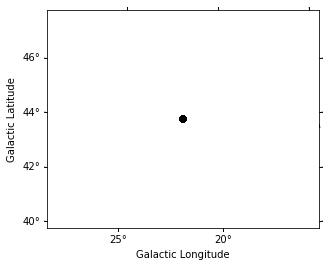

In [42]:
exclusion_mask = geom.to_image().region_mask([on_region], inside=False)
exclusion_mask = WcsNDMap(geom.to_image(), exclusion_mask)
print(exclusion_mask)
exclusion_mask.plot();

In [31]:
%%time
maker = MapMaker(geom, offset_max="2 deg")
maps = maker.run(observations)
print(maps.keys())

IndexError: No HDU found matching: OBS_ID = 5079502, HDU_TYPE = bkg, HDU_CLASS = None

In [32]:
# The maps are cubes, with an energy axis.
# Let's also make some images:
images = maker.run_images()

excess = images["counts"].copy()
excess.data -= images["background"].data
images["excess"] = excess

ValueError: Requires observations...

In [ ]:
np.max(images["counts"].data)

In [ ]:
images["counts"].smooth(2).plot(vmax=12276);

In [ ]:
images["background"].plot(vmax=12276);

In [ ]:
images["excess"].smooth(3).plot(vmax=500);

In [ ]:
kernel = Gaussian2DKernel(1, mode="oversample").array
plt.imshow(kernel);

In [ ]:
%%time
ts_image_estimator = TSMapEstimator()
images_ts = ts_image_estimator.run(images, kernel)
print(images_ts.keys())

In [ ]:
sources = find_peaks(images_ts["sqrt_ts"], threshold=8)
sources

In [ ]:
source_pos = SkyCoord(sources["ra"], sources["dec"])
source_pos

In [ ]:
# Plot sources on top of significance sky image
images_ts["sqrt_ts"].plot(add_cbar=True)

plt.gca().scatter(
    source_pos.ra.deg,
    source_pos.dec.deg,
    transform=plt.gca().get_transform("icrs"),
    color="none",
    edgecolor="white",
    marker="o",
    s=500,
    lw=4,
);

CPU times: user 1 s, sys: 88.3 ms, total: 1.09 s
Wall time: 877 ms


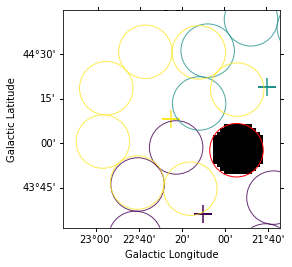

In [43]:
%%time
bkg_estimator = ReflectedRegionsBackgroundEstimator(
    observations=observations,
    on_region=on_region,
    exclusion_mask=exclusion_mask,
)
bkg_estimator.run()
bkg_estimate = bkg_estimator.result
bkg_estimator.plot();

In [44]:
print('1',bkg_estimator.finder.reference_map.geom.wcs)
wcs = bkg_estimator.finder.reference_map.geom.wcs

print('2',bkg_estimator.finder.region.to_pixel(wcs))
bkg_estimator.finder._pix_region = bkg_estimator.finder.region.to_pixel(wcs)
print('9',bkg_estimator.finder._pix_region.radius)

bkg_estimator.finder._pix_center = PixCoord(*bkg_estimator.finder.center.to_pixel(wcs))
print('9',bkg_estimator.finder._pix_center.x)
print('8',bkg_estimator.finder.center.to_pixel(wcs))
print('3',bkg_estimator.finder._offset)
center = bkg_estimator.finder.center
print('4',bkg_estimator.finder.center)
print('5',bkg_estimator.finder.region.center)
print('6',bkg_estimator.finder.reference_map)
print('7',center)
#print(obs.pointing_radec)
#observations
#for obs in observations:
#    print(obs)

1 WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-TAN'  'GLAT-TAN'  
CRVAL : 22.41606871562946  44.14002808238188  
CRPIX : 31.0  31.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.02  0.02  
NAXIS : 61  61
2 Region: CirclePixelRegion
center: PixCoord(x=48.25188207058365, y=21.262756410000527)
radius: 7.500222766776973
9 7.500222766776973
9 30.0
8 (array(30.), array(30.))
3 20.235380517041843
4 <SkyCoord (ICRS): (ra, dec) in deg
    (238.9375, 11.59472179)>
5 <SkyCoord (Galactic): (l, b) in deg
    (21.90891894, 43.96416222)>
6 WcsNDMap

	geom  : WcsGeom 
 	axes  : lon, lat
	shape : (61, 61)
	ndim  : 2
	unit  : '' 
	dtype : float32 

7 <SkyCoord (ICRS): (ra, dec) in deg
    (238.9375, 11.59472179)>


In [45]:
%%time
extract = SpectrumExtraction(
    observations=observations, bkg_estimate=bkg_estimate
)
extract.run()


CPU times: user 1.09 s, sys: 0 ns, total: 1.09 s
Wall time: 1.08 s


In [82]:
%%time
model = models.PowerLaw(
    index=2, amplitude=1e-11 * u.Unit("cm-2 s-1 TeV-1"), reference=1 * u.TeV
)

for dataset in extract.spectrum_observations:
    dataset.model = model

fit = Fit(extract.spectrum_observations)
result = fit.run()
print(result)

OptimizeResult

	backend    : minuit
	method     : minuit
	success    : False
	message    : Optimization failed.
	nfev       : 34
	total stat : 226.41

CPU times: user 318 ms, sys: 0 ns, total: 318 ms
Wall time: 318 ms


/home/rishank/anaconda2/envs/gammapy-0.12/lib/python3.6/site-packages/astropy/units/quantity.py:463: RuntimeWarning: overflow encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/rishank/anaconda2/envs/gammapy-0.12/lib/python3.6/site-packages/astropy/units/quantity.py:463: RuntimeWarning: invalid value encountered in subtract
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [83]:
oopts = {}
re = fit.optimize(**oopts)
opts = {}
opts.setdefault("backend", "minuit")
r = fit.covariance(**opts)

False


In [84]:
print(re.success)
print(r.success)

True
True


In [47]:
# Flux points are computed on stacked observation
from gammapy.spectrum import SpectrumDatasetOnOffStacker

stacker = SpectrumDatasetOnOffStacker(extract.spectrum_observations)
stacked_obs = stacker.run()

print(stacked_obs)

In [48]:
ebounds = EnergyBounds.equal_log_spacing(1, 40, 4, unit=u.TeV)

stacked_obs.model = model

fpe = FluxPointsEstimator(datasets=[dataset], e_edges=ebounds)
flux_points = fpe.run()
flux_points.table_formatted

e_ref,e_min,e_max,ref_dnde,ref_flux,ref_eflux,ref_e2dnde,norm,loglike,norm_err,counts [1],norm_errp,norm_errn,norm_ul,sqrt_ts,ts,norm_scan [11],dloglike_scan [11],dnde,dnde_ul,dnde_err,dnde_errp,dnde_errn
TeV,TeV,TeV,1 / (cm2 s TeV),1 / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),,,,,,,,,,,,1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV)
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1.565,1.000,2.448,4.084e-12,5.916e-12,8.954e-12,1.000e-11,nan,1.335,nan,0,nan,nan,nan,0.000,0.000,0.200 .. 5.000,1.3353139262452278 .. 1.3353139262452278,nan,nan,nan,nan,nan
3.831,2.448,5.995,6.813e-13,2.416e-12,8.954e-12,1.000e-11,nan,0.000,nan,0,nan,nan,nan,0.517,0.267,0.200 .. 5.000,0.2670627852490455 .. 0.2670627852490455,nan,nan,nan,nan,nan
10.000,5.995,16.681,1.000e-13,1.069e-12,1.023e-11,1.000e-11,nan,0.000,nan,0,nan,nan,nan,0.000,0.000,0.200 .. 5.000,0.0 .. 0.0,nan,nan,nan,nan,nan
26.102,16.681,40.842,1.468e-14,3.546e-13,8.954e-12,1.000e-11,nan,0.000,nan,0,nan,nan,nan,0.000,0.000,0.200 .. 5.000,0.0 .. 0.0,nan,nan,nan,nan,nan


In [49]:
model.parameters.covariance = result.parameters.covariance
flux_points_dataset = FluxPointsDataset(data=flux_points, model=model)

/home/rishank/anaconda2/envs/gammapy-0.12/lib/python3.6/site-packages/uncertainties/core.py:171: RuntimeWarning: invalid value encountered in less
  variances[variances < 0] = 0.


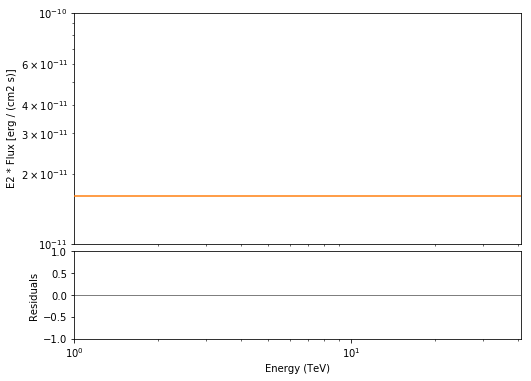

In [50]:
plt.figure(figsize=(8, 6))
flux_points_dataset.peek();